In [35]:
import numpy as np

In [36]:
import pandas as pd

In [37]:
data = pd.read_excel('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/002 - Multiple Regression/Multi-1.xlsx')

In [38]:
data.head()

,Experience,Age,Certifications,Grade,Salary
0,1,22,0,C,10000
1,2,23,0,C,11000
2,3,24,0,B,12000
3,4,25,1,C,12500
4,5,26,1,B,11000


In [39]:
pd.get_dummies(data['Grade']) # one hot encoding for 'Grade'

,A,B,C
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,0,1,0


In [40]:
ohe = pd.get_dummies(data['Grade'])

In [41]:
data = data.join(ohe)

In [42]:
data.head()

,Experience,Age,Certifications,Grade,Salary,A,B,C
0,1,22,0,C,10000,0,0,1
1,2,23,0,C,11000,0,0,1
2,3,24,0,B,12000,0,1,0
3,4,25,1,C,12500,0,0,1
4,5,26,1,B,11000,0,1,0


In [43]:
data.drop('Grade', axis=1, inplace=True)

In [44]:
data.head()

,Experience,Age,Certifications,Salary,A,B,C
0,1,22,0,10000,0,0,1
1,2,23,0,11000,0,0,1
2,3,24,0,12000,0,1,0
3,4,25,1,12500,0,0,1
4,5,26,1,11000,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
from sklearn.metrics import r2_score

In [48]:
import matplotlib.pyplot as plt

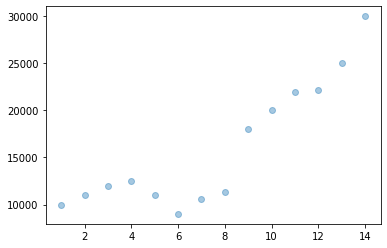

In [49]:
plt.scatter(data['Experience'], data['Salary'], alpha=0.4)

In [50]:
dependent_variable = 'Salary'

In [54]:
independent_variables = data.columns.to_list()

In [55]:
print(independent_variables)

['Experience', 'Age', 'Certifications', 'Salary', 'A', 'B', 'C']


In [57]:
independent_variables.remove('Salary')

In [58]:
independent_variables

['Experience', 'Age', 'Certifications', 'A', 'B', 'C']

In [59]:
X = data[independent_variables].values

In [62]:
y = data[dependent_variable].values

In [63]:
X

array([[ 1, 22,  0,  0,  0,  1],
       [ 2, 23,  0,  0,  0,  1],
       [ 3, 24,  0,  0,  1,  0],
       [ 4, 25,  1,  0,  0,  1],
       [ 5, 26,  1,  0,  1,  0],
       [ 6, 25,  2,  0,  1,  0],
       [ 7, 28,  3,  0,  0,  1],
       [ 8, 32,  1,  1,  0,  0],
       [ 9, 30,  4,  1,  0,  0],
       [10, 35,  5,  0,  1,  0],
       [11, 32,  5,  0,  0,  1],
       [12, 33,  6,  1,  0,  0],
       [13, 41,  7,  1,  0,  0],
       [14, 35,  6,  1,  0,  0]], dtype=int64)

In [64]:
y

array([10000, 11000, 12000, 12500, 11000,  9000, 10598, 11300, 18000,
       20000, 22000, 22200, 25000, 30000], dtype=int64)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
scaler = MinMaxScaler()

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_predicted = model.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(y_test, y_predicted))

1932.117073827349

In [73]:
r2_score(y_test, y_predicted)

0.8675587847572673

In [74]:
X_test

array([[ 0.66666667,  0.66666667,  0.71428571,  0.        ,  1.        ,
         0.        ],
       [ 0.83333333,  0.55555556,  0.85714286,  1.        ,  0.        ,
         0.        ],
       [-0.08333333, -0.05555556,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [78]:
model.predict([[0.8, 0.7, 0.8, 0, 0, 1]]) # let's predict on a new value. Shape of new value has to be like X_test

array([21504.9474513])

In [79]:
model.predict([[0.8, 0.7, 0.8, 1, 0, 0]]) # you can see difference in predicted value based on OHE

array([23024.26754135])